In [30]:
import pandas as pd

df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [31]:
df.shape

(16, 4)

In [32]:
df['degree_number'] = df['degree'].map({'bachelors': 1, 'masters': 2})
df.head()

,company,job,degree,salary_more_then_100k,degree_number
0,google,sales executive,bachelors,0,1
1,google,sales executive,masters,0,2
2,google,business manager,bachelors,1,1
3,google,business manager,masters,1,2
4,google,computer programmer,bachelors,0,1


In [33]:
df.drop('degree', axis='columns', inplace=True)
df.head()

,company,job,salary_more_then_100k,degree_number
0,google,sales executive,0,1
1,google,sales executive,0,2
2,google,business manager,1,1
3,google,business manager,1,2
4,google,computer programmer,0,1


In [34]:
df_encoded = pd.get_dummies(df, columns=['company', 'job'], drop_first=True)
df_encoded.head()

,salary_more_then_100k,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,0,1,False,True,False,True
1,0,2,False,True,False,True
2,1,1,False,True,False,False
3,1,2,False,True,False,False
4,0,1,False,True,True,False


In [35]:
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop('salary_more_then_100k', axis='columns')
y = df_encoded['salary_more_then_100k']

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [36]:
from sklearn.metrics import classification_report

y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [37]:
from sklearn.tree import export_text

print(export_text(model, feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- company_google <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- company_google >  0.50
|   |   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



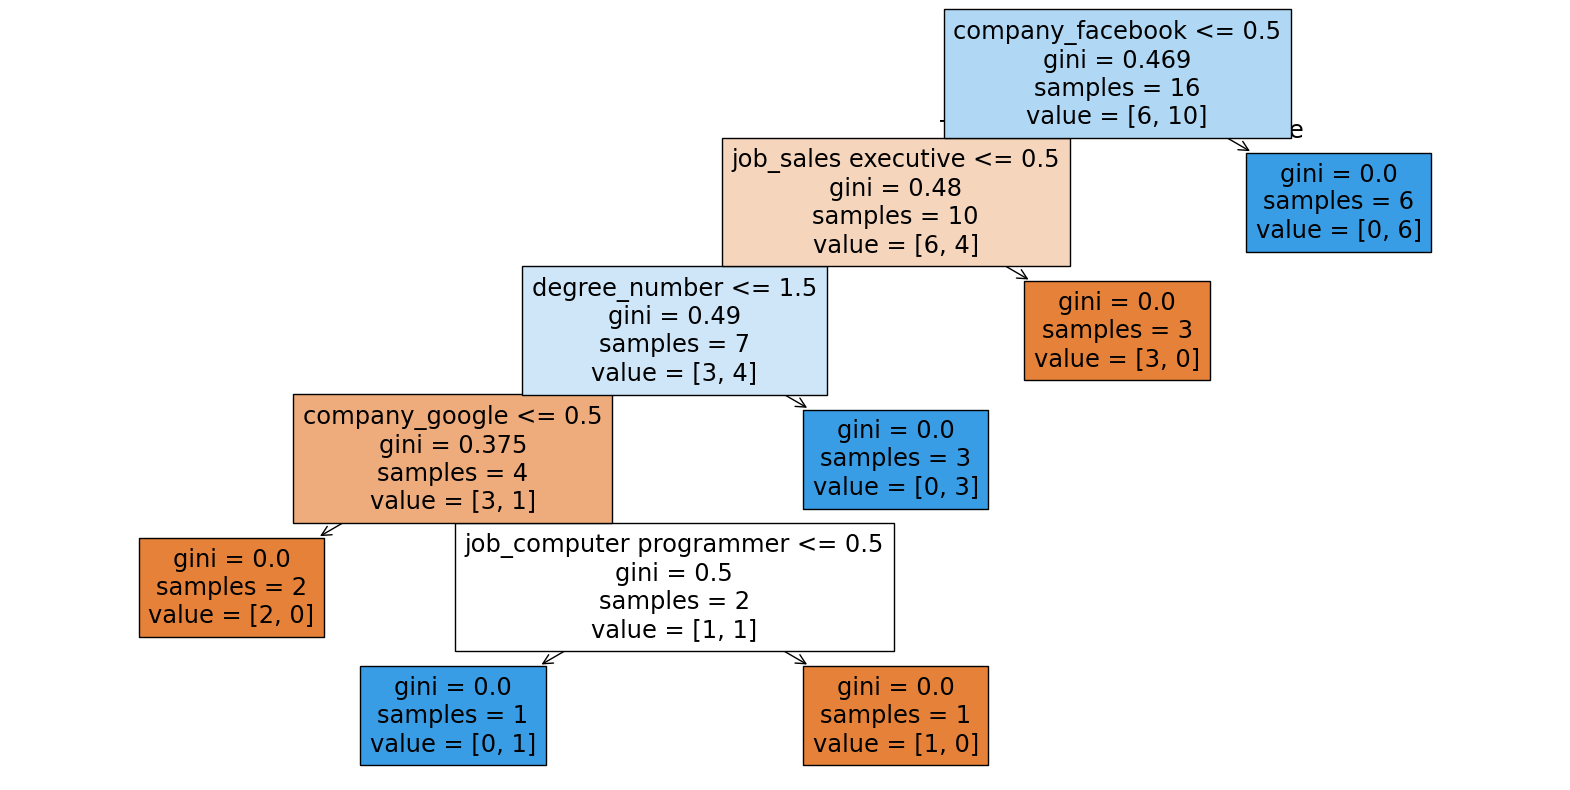

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=list(X.columns), filled=True)
plt.show()

In [39]:
df = pd.read_csv('pet_adoption_data.csv')

df.head()

,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [40]:
df.shape

(2007, 13)

In [41]:
df.isna().sum()

pet_id                 0
pet_type               0
breed                  0
age_months             0
color                  0
size                   0
weight_kg              0
vaccinated             0
health_condition       0
timein_shelter_days    0
adoption_fee           0
previous_owner         0
adoption_likelihood    0
dtype: int64

In [42]:
df.drop(['pet_id'], inplace=True, axis=1)

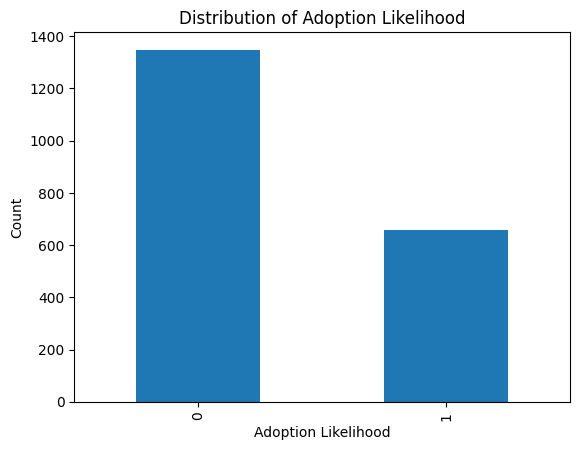

In [43]:
df['adoption_likelihood'].value_counts().plot(kind='bar')
plt.title('Distribution of Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')
plt.show()

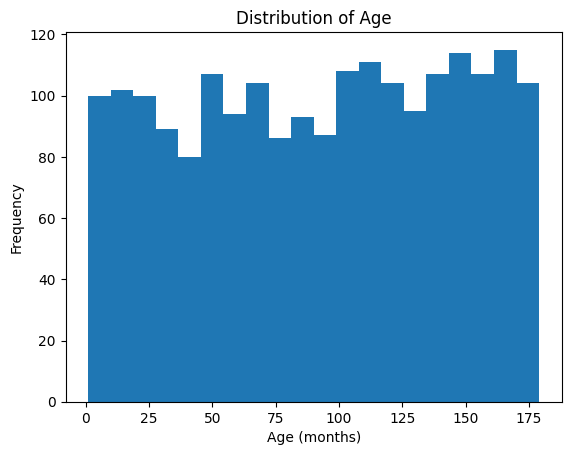

In [44]:
df['age_months'].plot(kind='hist', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age (months)')
plt.show()

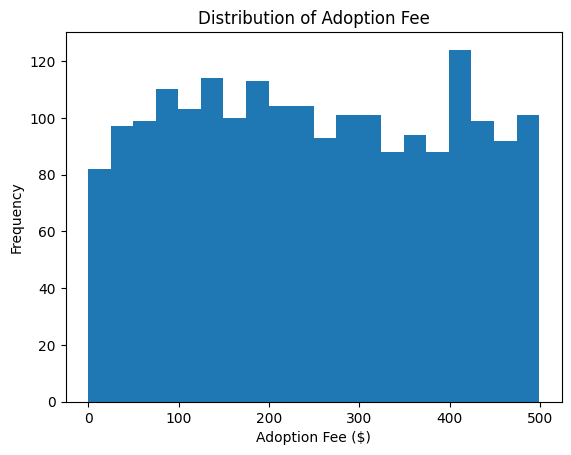

In [45]:
df['adoption_fee'].plot(kind='hist', bins=20)
plt.title('Distribution of Adoption Fee')
plt.xlabel('Adoption Fee ($)')
plt.show()

In [46]:
# Encode 'size' column data using ordinal encoding
df['size'] = df['size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)

In [47]:
# minmax scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df['weight_kg'] = scaler.fit_transform(df[['weight_kg']])

scaler = StandardScaler()
df['adoption_fee'] = scaler.fit_transform(df[['adoption_fee']])

In [48]:
df.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,0.138783,1,0,27,-0.764025,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,0.520009,0,0,8,-0.098998,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,0.036514,0,0,85,0.951044,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,0.080105,0,0,61,-0.225003,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,0.672244,0,0,28,-1.646060,1,0,False,...,False,False,False,True,False,False,False,False,True,False


In [49]:
from sklearn.model_selection import train_test_split

X = df.drop('adoption_likelihood', axis=1)
y = df['adoption_likelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8723051409618574

In [51]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       403
           1       0.78      0.86      0.82       200

    accuracy                           0.87       603
   macro avg       0.85      0.87      0.86       603
weighted avg       0.88      0.87      0.87       603



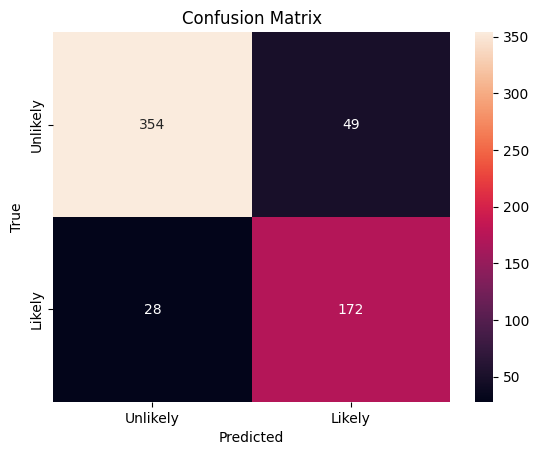

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
model_custom = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
model_custom.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10)

In [54]:
model_custom.score(X_test, y_test)

0.9054726368159204

In [58]:
y_pred_custom = model_custom.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       403
           1       0.90      0.81      0.85       200

    accuracy                           0.91       603
   macro avg       0.90      0.88      0.89       603
weighted avg       0.91      0.91      0.90       603



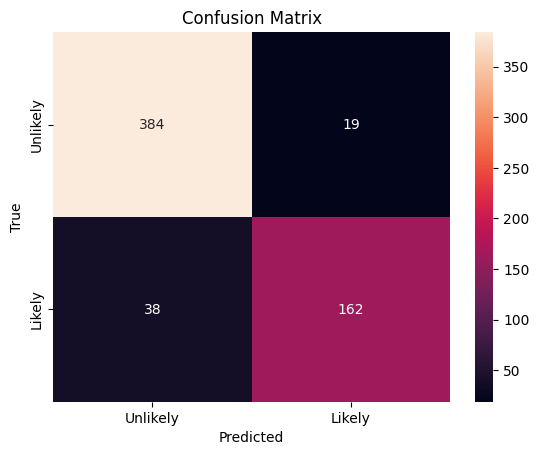

In [59]:
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
from sklearn.tree import  export_text

print(export_text(model_custom, feature_names=list(X.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- size <= 1.50
|   |   |   |--- age_months <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- age_months >  21.50
|   |   |   |   |--- class: 0
|   |   |--- size >  1.50
|   |   |   |--- size <= 2.50
|   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- size >  2.50
|   |   |   |   |--- adoption_fee <= -0.49
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- adoption_fee >  -0.49
|   |   |   |   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- pet_type_Dog <= 0.50
|   |   |   |--- timein_shelter_days <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- timein_shelter_days >  34.50
|   |   |   |   |--- color_Brown <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- color_Brown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- pet_type_Dog >  0.50
|   |   |   |--- size <= 2.5

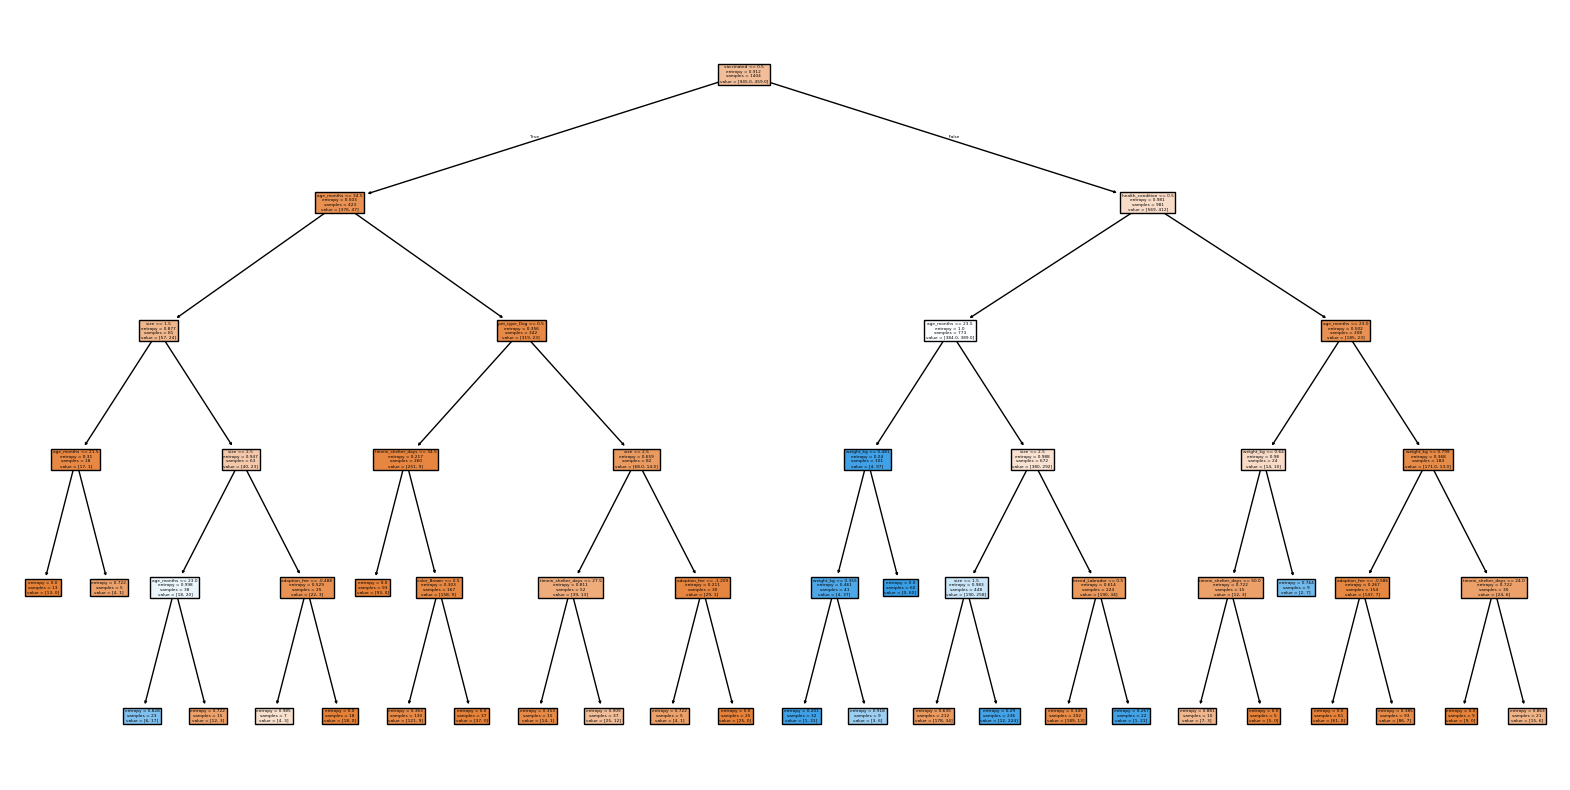

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model_custom, feature_names=list(X.columns), filled=True)
plt.show()